In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [2]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

C:\Users\Bonas Nelson\AppData\Local\Temp\ipykernel_11588\1730346143.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bos.drop("Price", 1)       # feature matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

In [5]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [6]:
sfs.fit(X, y)
sfs.k_feature_names_   

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

In [7]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

In [8]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)
print(sbs.k_feature_names_)
print(sbs.k_score_)


('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
0.7405822802569575


In [9]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)",[0.5441462975864797],0.544146,"(LSTAT,)",NaN,0.0,NaN
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)",NaN,0.0,NaN
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)",NaN,0.0,NaN
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)",NaN,0.0,NaN
5,"(4, 5, 7, 10, 12)",[0.7080892893529661],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)",NaN,0.0,NaN
6,"(3, 4, 5, 7, 10, 12)",[0.7157742117396082],0.715774,"(CHAS, NOX, RM, DIS, PTRATIO, LSTAT)",NaN,0.0,NaN
7,"(3, 4, 5, 7, 10, 11, 12)",[0.7221614025277103],0.722161,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)",NaN,0.0,NaN
8,"(1, 3, 4, 5, 7, 10, 11, 12)",[0.726607858739603],0.726608,"(ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)",NaN,0.0,NaN
9,"(0, 1, 3, 4, 5, 7, 10, 11, 12)",[0.7288250904754123],0.728825,"(CRIM, ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)",NaN,0.0,NaN
10,"(0, 1, 3, 4, 5, 7, 8, 10, 11, 12)",[0.7341767791171031],0.734177,"(CRIM, ZN, CHAS, NOX, RM, DIS, RAD, PTRATIO, B...",NaN,0.0,NaN


C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


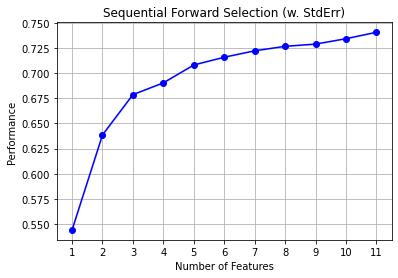

In [10]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()